# ImgLib2: Create, Open, & Display an Image

In [5]:
// @ImageJ ij
// @NotebookService nb

// Behind a firewall? Configure your proxy settings here.
//systemProperties = System.getProperties()
//systemProperties.setProperty("http.proxyHost","myproxy.domain")
//systemProperties.setProperty("http.proxyPort","8080")

//////////////////////////////////////////////////////////////
// Load ImageJ. This may take some minutes the first time   //
// while ImageJ is installed into ~/.groovy/grapes locally. //
//////////////////////////////////////////////////////////////
/*@GrabResolver(name='imagej', root='http://maven.imagej.net/content/groups/public/')
@Grab('net.imagej:imagej:2.0.0-rc-58')
import net.imagej.ImageJ
ij = new ImageJ()*/
println("ImageJ is ready to go.")

ImageJ is ready to go.


null

## Creating and Displaying an Image

The following piece of code creates and displays an 400x320 8-bit gray-level image:

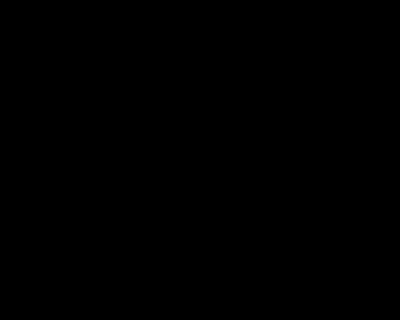

In [6]:
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.type.numeric.integer.UnsignedByteType
 
// will create a window showing a black 400x320 image
long[] dimensions = [400, 320]
final Img< UnsignedByteType > img = new ArrayImgFactory< UnsignedByteType >().create( dimensions,
    new UnsignedByteType() )

// show image
nb.display( img )

Breaking _lines 6-9_ into individual steps...

1 <code>final ImgFactory< UnsignedByteType > factory = new ArrayImgFactory< UnsignedByteType >();</code>

2 <code>final long[] dimensions = new long[] { 400, 320 };</code>

3 <code>final UnsignedByteType type = new UnsignedByteType();</code>

4 <code>final Img< UnsignedByteType > img = factory.create( dimensions, type );</code>


_Line 1:_ 
Pixel images in ImgLib2 are created using an [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html). There are different ImgFactories, that create pixel containers with different memory layouts. Here, we create an [ArrayImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImgFactory.html). This factory creates containers that map to a single flat Java array.

The type parameter of the factory that specifies the value type of the image we want to create. We want to create a 8-bit gray-level image, thus we use [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html).

_Line 2:_
Next we create a **long[]** array that specifies the image size in every dimension. The length of the array specifies the number of dimensions. Here, we state that we want to create 400x320 2D image.

_Line 3:_
We need to provide a type variable, that is a variable having the type that is to be stored in the image. This must match the generic type parameter of the [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html). Thus we create an [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html).  

_Line 4:_
We create the image, using the factory, dimensions, and type variable.  We store the result of the **create()** method in an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) variable. [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) is a convenience interface that gathers properties of pixel image containers such as having a number of dimensions, being able to iterate it's pixels, etc.

## Opening and Displaying Image Files

You can open image files with [ImgOpener](http://javadoc.imagej.net/SCIFIO/io/scif/img/ImgOpener.html) which is using [Bio-Formats](http://www.openmicroscopy.org/site/support/bio-formats5.1/). The following opens and displays an image file.

[INFO] Populating metadata
[INFO] Populating metadata


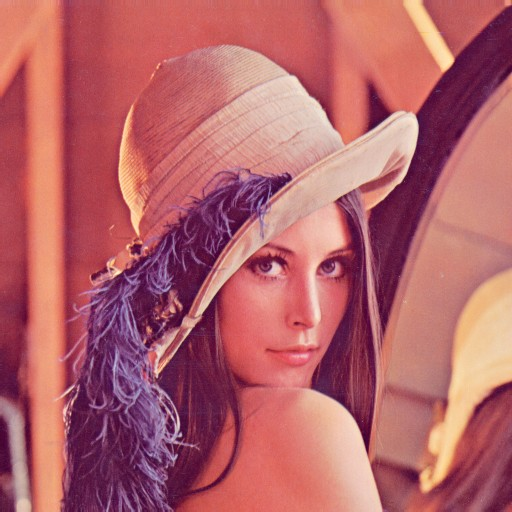

In [7]:
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.type.numeric.integer.UnsignedByteType
//import net.imglib2.img.display.imagej.ImageJFunctions
import io.scif.img.ImgIOException
import io.scif.img.ImgOpener
import net.imagej.ImageJ

// create an ImageJ gateway
ij = new ImageJ()

// save path for an image of Lena
path = "http://wsr.imagej.net/images/lena.jpg"

// load image
final Img< UnsignedByteType > img = new ImgOpener().openImg( path, new ArrayImgFactory< UnsignedByteType >(),
    new UnsignedByteType() );

// display the image
nb.display(img)

Again, breaking _lines 12-13_ into individual steps...

1 <code> final ImgOpener opener = new ImgOpener();</code>

2 <code> final ImgFactory< UnsignedByteType > factory = new ArrayImgFactory< UnsignedByteType >();</code>

3 <code> final UnsignedByteType type = new UnsignedByteType();</code>

4 <code> final Img< UnsignedByteType > img = opener.openImg( path, factory, type );</code>


_Line 1:_
When opening an image, we can specify which memory layout to use and as which value type we want to load the image. We want to use the [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) layout again, and we want to have [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html) values again. We need an [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html) and an instance of the value type.

_Line 4:_
We can use the **openImg()** method, giving a filename, [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html), and type instance.

> _NOTE:_

> Note that [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) is just convenience interface. When you get more proficient with ImgLib2 you will find yourself using it less and less. You will either be more concrete or more general than that. In the above example, we could be more concrete -- the result of the **ArrayImgFactory< UnsignedByteType >.create()** is actually an **ArrayImg< UnsignedByteType, ByteArray >**. In algorithm implementations, you want to be as generic as possible to not constrain yourself to specific image types. You will specify only the super-interfaces of [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) that you really need. For instance, if you need something which has boundaries and can be iterated you would use [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html).
